***Jonatan Pereira 0050014780***

In [0]:
import pandas as pd # conventional alias
from sklearn.datasets import load_boston

dataset = load_boston()

In [0]:
base = pd.DataFrame(dataset.data)

In [4]:
base.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
base.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


***a base de dados possui 505 observações e 12 colunas***

***3 - possui 11 features***

In [10]:
base.columns = dataset.feature_names
base.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**4 - coluna 12 LSTAT**

In [11]:
#questao 5
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


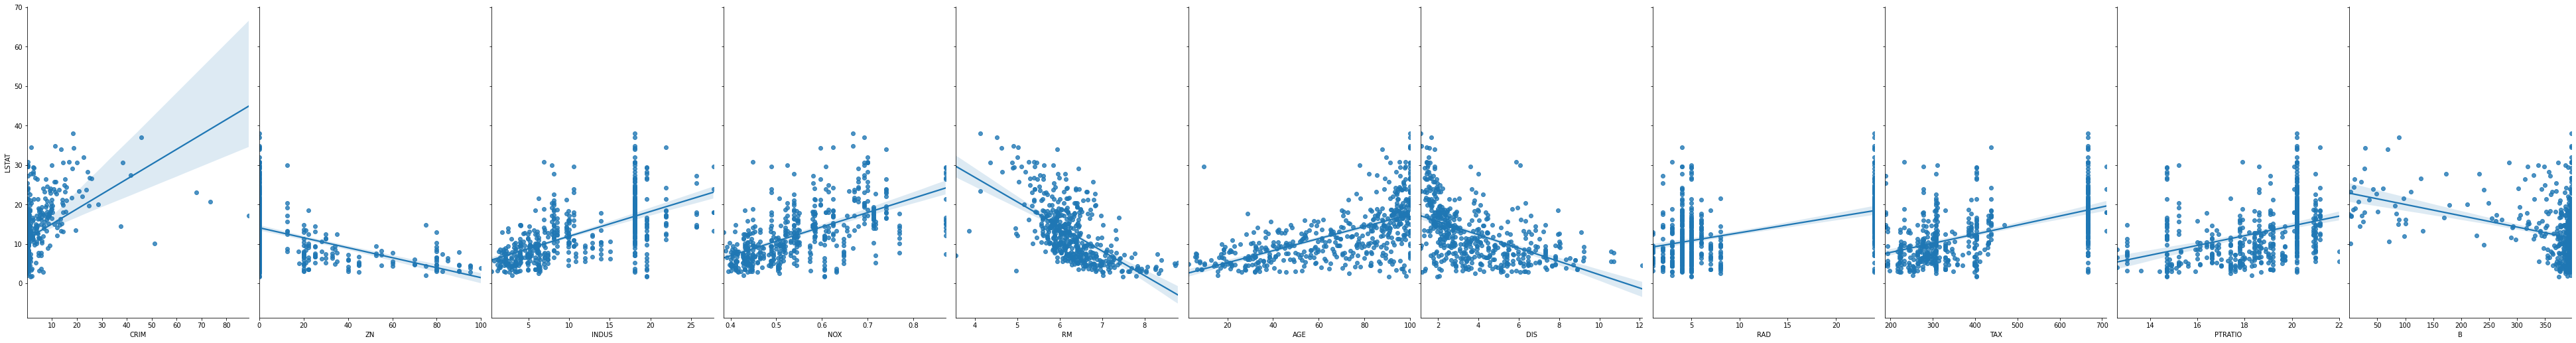

In [21]:
sns.pairplot(base, x_vars=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B'], y_vars='LSTAT', height=7, aspect=0.7, kind='reg')

In [0]:
X = base[['CRIM','ZN','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO']]
Y = base.B

In [25]:
X.head()

,CRIM,ZN,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,0.02731,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
2,0.02729,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
3,0.03237,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
4,0.06905,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7


In [41]:
Y.head()

0    396.90
1    396.90
2    392.83
3    394.63
4    396.90
Name: B, dtype: float64

In [42]:
print(type(X))
print(type(Y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


***7 - x recebe algumas proporções da condição da cidade onde mora como taxa de crimalidade, gases tóxicos, tempo de habitação , distancia até a rodoviária masi próxima entre outros e y recebe a proporção de negros por cidade***

**8 - Essa base de dado é para tentar mostrar as cidades onde tem uma alta concetraçõa de negros e as condições que cada cidade tem. Ex: se a cidade tem uma condição muito boa de se viver e a taxa de negros é baixa e vice versa**

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(379, 9)
(379,)
(127, 9)
(127,)


***10 - Em torno de 75% para treino e 25% para teste ***

In [45]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print(linreg.intercept_)
print(linreg.coef_)

462.7403718166286
[-1.49046373e+00 -5.08152376e-03 -1.42507849e+02  6.16597316e-01
 -9.65471019e-02 -2.89755251e+00 -1.88863311e+00 -5.07436364e-02
  1.76781912e+00]


In [48]:
list(zip(X, linreg.coef_))

[('CRIM', -1.4904637321402578),
 ('ZN', -0.005081523762118817),
 ('NOX', -142.50784873563822),
 ('RM', 0.6165973160684912),
 ('AGE', -0.09654710194528321),
 ('DIS', -2.897552513344366),
 ('RAD', -1.8886331119277928),
 ('TAX', -0.05074363639024562),
 ('PTRATIO', 1.7678191242218868)]

In [0]:
y_pred = linreg.predict(x_test)

In [50]:
import numpy as np
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

84.7520934835802


***16 - Sim, teria. Eu posso retirar as tabelas que estão com uma dispersão muito grande no gráfico para tentar reduzir essa margem.***